In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Algerian_forest_fires_CLEANED.csv")

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.drop(["day","month","year"],axis=1,inplace=True)

In [5]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
# Encoding 
df["Classes"]=np.where(df["Classes"].str.contains("not fire"),0,1)

In [9]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [10]:
# Independent and dependent features
X= df.drop('FWI', axis=1)
y=df["FWI"]

In [26]:
# Train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.24, random_state=42)

In [27]:
X_train.shape,X_test.shape

((184, 11), (59, 11))

In [13]:
# Feature selection based on coorelation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.658838,-0.307894,-0.318994,0.696714,0.498973,0.390693,0.631354,0.474035,0.545368,0.260710
RH,-0.658838,1.000000,0.231659,0.243219,-0.654778,-0.417470,-0.238297,-0.718423,-0.364886,-0.461483,-0.401116
Ws,-0.307894,0.231659,1.000000,0.251717,-0.192245,-0.005482,0.091624,-0.028658,0.029927,-0.084063,-0.200575
Rain,-0.318994,0.243219,0.251717,1.000000,-0.546140,-0.289713,-0.301912,-0.346329,-0.300717,-0.370797,-0.062344
FFMC,0.696714,-0.654778,-0.192245,-0.546140,1.000000,0.620692,0.523423,0.751401,0.606760,0.782395,0.255048
DMC,0.498973,-0.417470,-0.005482,-0.289713,0.620692,1.000000,0.868931,0.686857,0.983224,0.615315,0.213479
DC,0.390693,-0.238297,0.091624,-0.301912,0.523423,0.868931,1.000000,0.514758,0.942519,0.540932,-0.059769
ISI,0.631354,-0.718423,-0.028658,-0.346329,0.751401,0.686857,0.514758,1.000000,0.644944,0.742394,0.299179
BUI,0.474035,-0.364886,0.029927,-0.300717,0.606760,0.983224,0.942519,0.644944,1.000000,0.609800,0.115827
Classes,0.545368,-0.461483,-0.084063,-0.370797,0.782395,0.615315,0.540932,0.742394,0.609800,1.000000,0.196818


<Axes: >

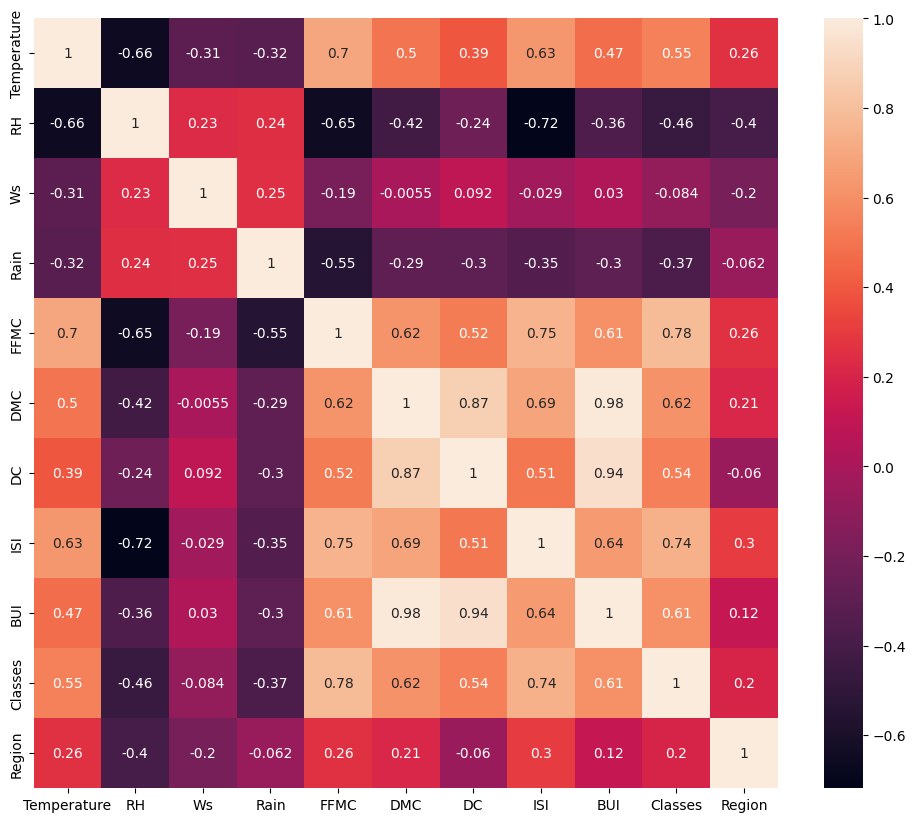

In [14]:
# Check for multicolienarity 

plt.figure(figsize=(12,10))
corelation= X_train.corr()
sns.heatmap(corelation,annot=True)

In [15]:
# Removing highly corelated feature 

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
                

In [28]:
# Threshold - Donmain Experties
corr_features=correlation(X_train,0.85)

In [29]:
# Drop features when corr is more then threshold
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((184, 9), (59, 9))

##  Feature scalling or standardization

In [22]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [36]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [38]:
X_train_scaled

array([[ 1.04431174, -1.9319257 , -0.97806006, ...,  0.96542324,
         0.89661673,  1.        ],
       [ 0.50227123, -0.4040039 ,  0.54382621, ..., -0.03293366,
         0.89661673,  1.        ],
       [-0.85283004,  0.79176099,  1.30476935, ..., -0.63659133,
        -1.11530374, -1.        ],
       ...,
       [-1.93691106,  0.92462375,  0.54382621, ..., -1.07772577,
        -1.11530374, -1.        ],
       [ 0.50227123, -0.20470975,  0.16335464, ...,  0.5939416 ,
         0.89661673,  1.        ],
       [-0.58180979,  0.99105514,  2.06571248, ..., -0.86876735,
        -1.11530374, -1.        ]], shape=(184, 9))

# Box plot to understand the effect of standard scaler

Text(0.5, 1.0, 'X_train after scaling')

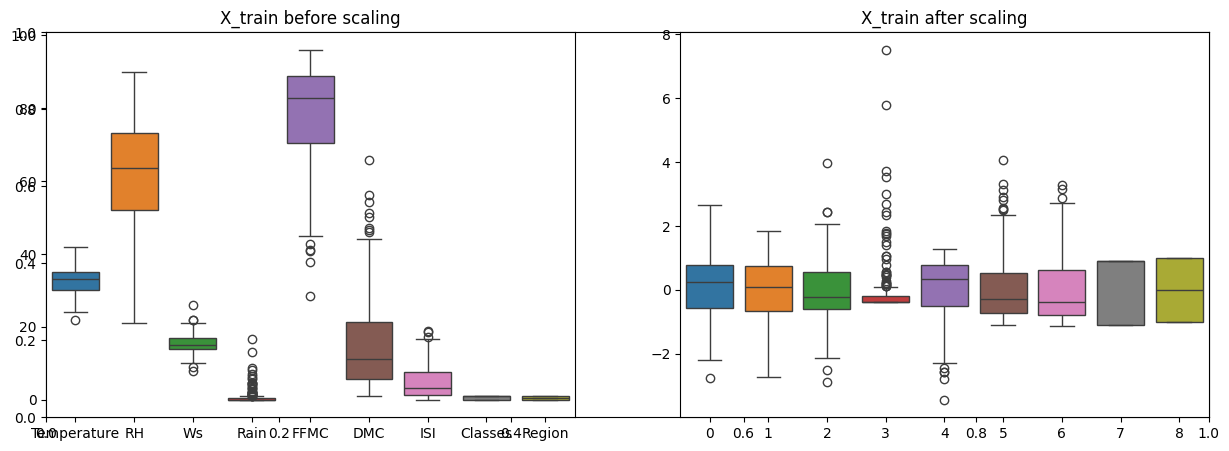

In [40]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after scaling")

##  Linear regression model

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg= LinearRegression()

In [48]:
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error ",mae)
print("R2 Score ",score)

Mean Absolute Error  0.55374770916416
R2 Score  0.9844432599139653


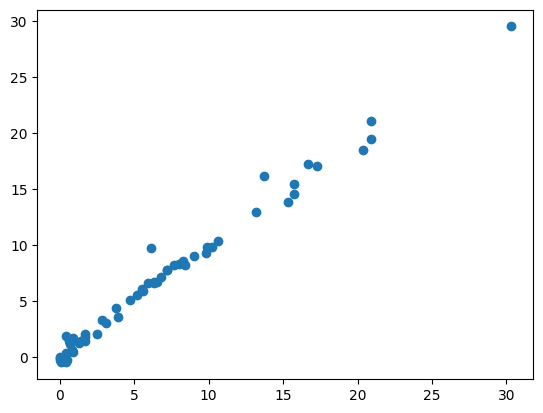

In [50]:
plt.scatter(y_test, y_pred)

#If it foolows a linear relationship the it is a good model

## Lasso regresion